In [1]:
import datetime
import pandas as pd
from pymongo import MongoClient

import plotly.offline as po
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

from matplotlib import pyplot as plt

In [2]:
client = MongoClient()
db = client['crypto']
tickers = db['tickers']
tickers.find_one()

{'_id': ObjectId('5e4dbe9680b9357bb9d3e3c0'),
 'symbol': 'BTC',
 'name': 'Bitcoin',
 'nameid': 'bitcoin',
 'rank': 1,
 'price_usd': 9621.14,
 'percent_change_24h': 0.3,
 'percent_change_1h': -0.6,
 'percent_change_7d': -1.6,
 'price_btc': 1,
 'market_cap_usd': 174986406001.8,
 'volume24': 34986790462.774574,
 'volume24a': 40356500274.80376,
 'csupply': 18187696.0,
 'tsupply': 18187696,
 'msupply': 21000000.0,
 'timestamp': '2020-02-18T13:35:04.000Z'}

In [3]:
t1 = datetime.datetime.now()
df = pd.DataFrame(list(tickers.find()))
print("Num Rows Loaded: {}\nDuration: {}".format(len(df),datetime.datetime.now()-t1))
df.head()

Num Rows Loaded: 14000
Duration: 0:00:00.579274


,_id,symbol,name,nameid,rank,price_usd,percent_change_24h,percent_change_1h,percent_change_7d,price_btc,market_cap_usd,volume24,volume24a,csupply,tsupply,msupply,timestamp
0,5e4dbe9680b9357bb9d3e3c0,BTC,Bitcoin,bitcoin,1,9621.14000,0.30,-0.60,-1.60,1.000000,1.749864e+11,3.498679e+10,4.035650e+10,1.818770e+07,18187696,2.100000e+07,2020-02-18T13:35:04.000Z
1,5e4dbe9680b9357bb9d3e3c1,ETH,Ethereum,ethereum,2,262.25000,6.18,-0.95,19.11,0.027189,2.870990e+10,2.253560e+10,2.501575e+10,1.094755e+08,109475492,NaN,2020-02-18T13:35:04.000Z
2,5e4dbe9680b9357bb9d3e3c2,XRP,XRP,ripple,3,0.27879,2.33,-1.63,3.09,0.000029,1.196277e+10,3.211521e+09,3.865344e+09,4.290954e+10,99991841593,1.000000e+11,2020-02-18T13:35:04.000Z
3,5e4dbe9680b9357bb9d3e3c3,BCH,Bitcoin Cash,bitcoin-cash,4,389.61000,2.52,-2.50,-12.50,0.040394,7.109927e+09,5.638212e+09,6.852482e+09,1.824896e+07,18248965,2.100000e+07,2020-02-18T13:35:04.000Z
4,5e4dbe9680b9357bb9d3e3c4,BCHSV,Bitcoin SV,bitcoin-cash-sv,5,291.67000,8.67,-5.18,-16.90,0.030240,5.321995e+09,3.297647e+09,3.099365e+09,1.824640e+07,21000000,2.100000e+07,2020-02-18T13:35:04.000Z


In [4]:
df_top10 = df[df['rank']<=10]
# df_top10.head()

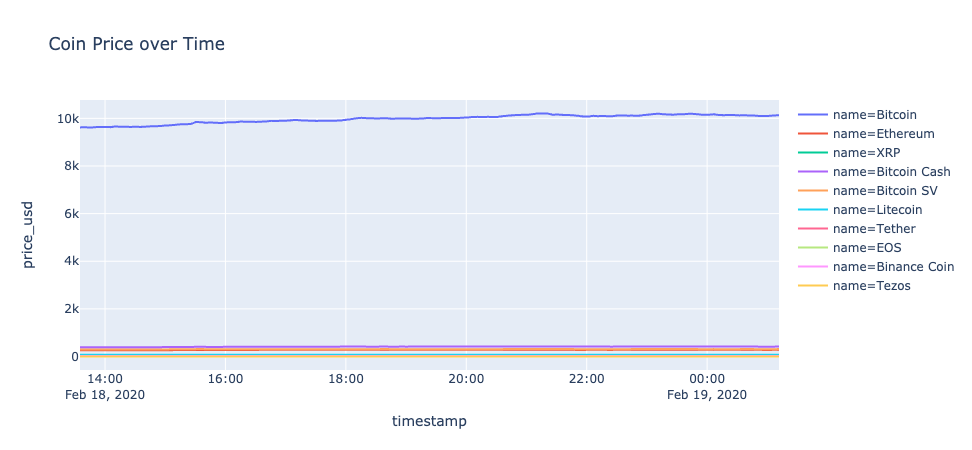

In [9]:
px.line(df_top10, x='timestamp', y='price_usd', color='name', title='Coin Price over Time')

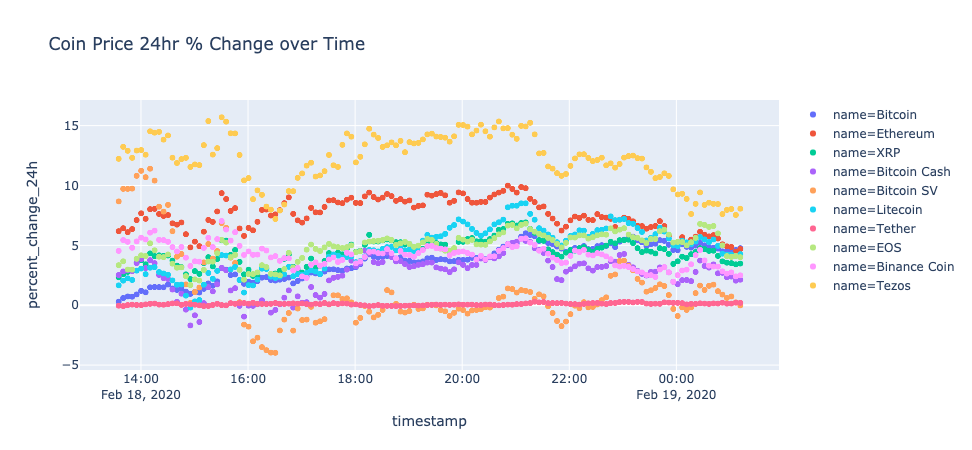

In [10]:
px.scatter(df_top10, x='timestamp', y='percent_change_24h', color='name', title='Coin Price 24hr % Change over Time')

In [7]:
df_marketshare = df_top10[df_top10.timestamp==max(df_top10.timestamp)].reset_index(drop=True)
# df_marketshare

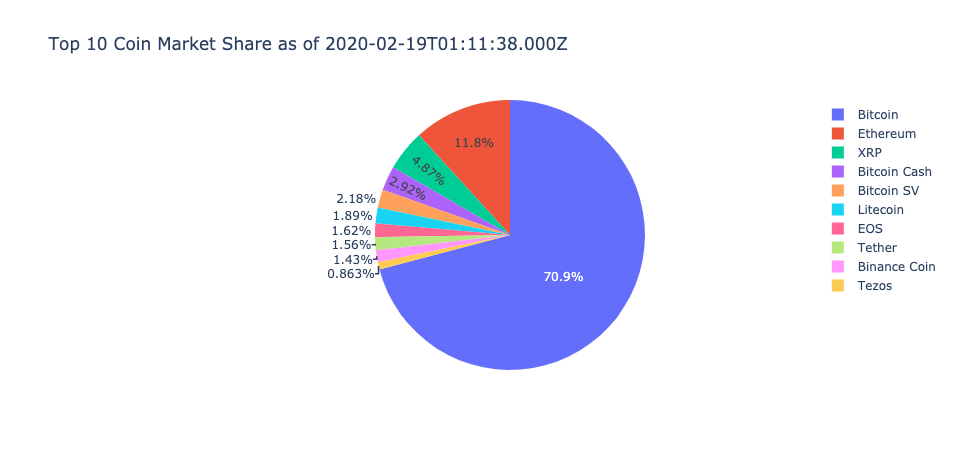

In [11]:
px.pie(df_marketshare, names='name', values='market_cap_usd', title='Top 10 Coin Market Share as of {}'.format(max(df_top10.timestamp)))